# Credit Card fraud Detection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
dff=pd.read_csv('/Users/chandrikajoshi/Downloads/creditcard.csv')

In [7]:
scaler = StandardScaler()
dff['scaled_amount'] = scaler.fit_transform(dff[['Amount']])
dff['scaled_time'] = scaler.fit_transform(dff[['Time']])

In [9]:
dff.drop(['Time', 'Amount'], axis=1, inplace=True)

In [11]:
dff = dff[['scaled_time', 'scaled_amount'] + [f'V{i}' for i in range(1, 29)] + ['Class']]

In [13]:
X = dff.drop('Class', axis=1)
y = dff['Class']

In [15]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=y.mean(), random_state=42)
model.fit(X)

IsolationForest(contamination=0.001727485630620034, random_state=42)

In [17]:
y_pred = model.predict(X)
y_pred = [1 if i == -1 else 0 for i in y_pred]  # Flip for fraud=1

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))
print("ROC-AUC Score:", roc_auc_score(y, y_pred))

Confusion Matrix:
 [[283967    348]
 [   348    144]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

ROC-AUC Score: 0.6457294661580701


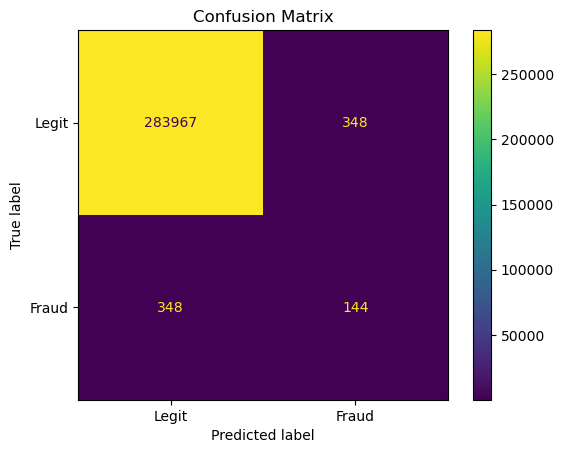

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["Legit", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [29]:
X = dff.drop('Class', axis=1)
y = dff['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [33]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[85280    15]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8918039617670311


In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=100)  # scale_pos_weight ≈ class imbalance ratio
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred = xgb.predict(X_test)

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[85284    11]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8918274098003273


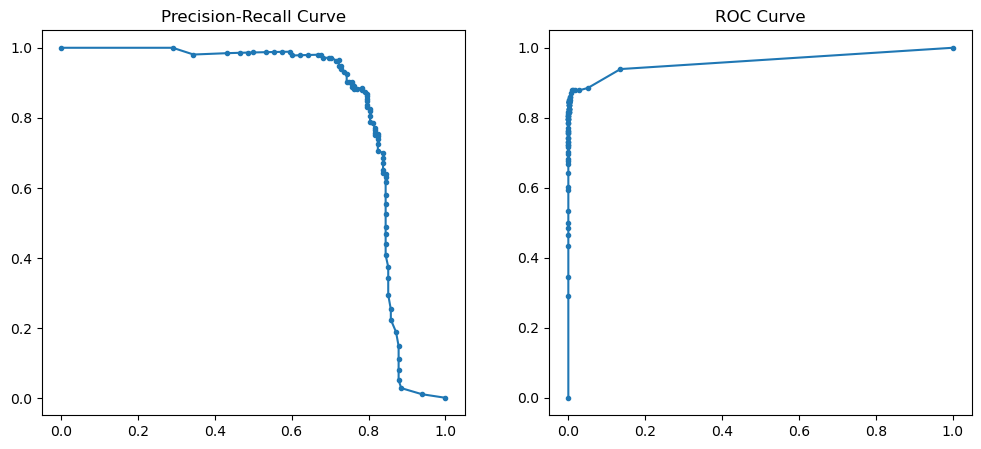

In [55]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc
import matplotlib.pyplot as plt
y_probs = rf.predict_proba(X_test)[:,1]  
precision, recall, _ = precision_recall_curve(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.show()

#  Isolation Forest Performance Improvement

In [59]:
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
y_pred_scores = iso_forest.fit_predict(X)

In [61]:
y_pred = [1 if x == -1 else 0 for x in y_pred_scores]

In [63]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("ROC-AUC Score:", roc_auc_score(y, y_pred))

[[283974    341]
 [   348    144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.30      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

ROC-AUC Score: 0.6457417764477137


In [67]:
import numpy as np
scores = iso_forest.decision_function(X)
threshold = np.percentile(scores, 1.7) 
y_pred = [1 if s < threshold else 0 for s in scores]

In [69]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("ROC-AUC Score:", roc_auc_score(y, scores))

[[279821   4494]
 [   144    348]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.71      0.13       492

    accuracy                           0.98    284807
   macro avg       0.54      0.85      0.56    284807
weighted avg       1.00      0.98      0.99    284807

ROC-AUC Score: 0.05077241705888737


In [73]:
X = dff.drop('Class', axis=1)
y = dff['Class']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [77]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:36:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [81]:
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

[[85257    38]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9708236755425923
